# Antibody Response Pulse
https://github.com/blab/antibody-response-pulse

### B-cells evolution --- cross-reactive antibody response after influenza virus infection or vaccination
### Adaptive immune response for repeated infection

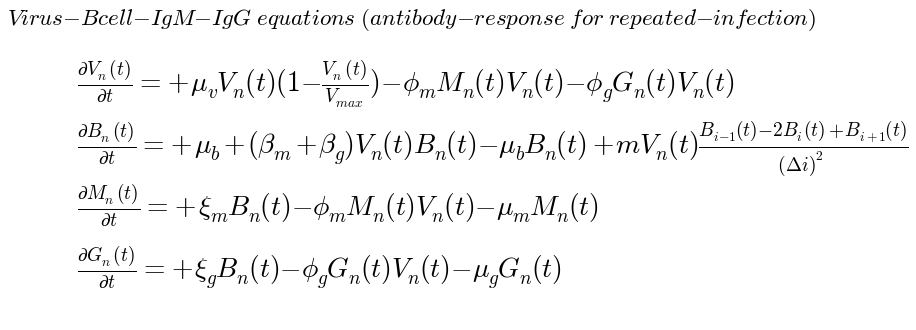

In [1]:
'''
author: Alvason Zhenhua Li
date:   04/09/2015
'''
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.ticker import FuncFormatter

import alva_machinery_event_OAS_new as alva

AlvaFontSize = 23
AlvaFigSize = (15, 5)
numberingFig = 0

# plotting
dir_path = '/Users/al/Desktop/GitHub/antibody-response-pulse/bcell-array/figure'
file_name = 'Virus-Bcell-IgM-IgG'
figure_name = '-equation'
file_suffix = '.png'
save_figure = os.path.join(dir_path, file_name + figure_name + file_suffix)

numberingFig = numberingFig + 1
plt.figure(numberingFig, figsize=(12, 5))
plt.axis('off')
plt.title(r'$ Virus-Bcell-IgM-IgG \ equations \ (antibody-response \ for \ repeated-infection) $'
          , fontsize = AlvaFontSize)
plt.text(0, 7.0/9, r'$ \frac{\partial V_n(t)}{\partial t} = \
         +\mu_{v} V_{n}(t)(1 - \frac{V_n(t)}{V_{max}}) - \phi_{m} M_{n}(t) V_{n}(t) - \phi_{g} G_{n}(t) V_{n}(t) $'
         , fontsize = 1.2*AlvaFontSize)
plt.text(0, 5.0/9, r'$ \frac{\partial B_n(t)}{\partial t} = \
         +\mu_{b} + (\beta_{m} + \beta_{g}) V_{n}(t) B_{n}(t) - \mu_{b} B_{n}(t) \
         + m V_{n}(t)\frac{B_{i-1}(t) - 2B_i(t) + B_{i+1}(t)}{(\Delta i)^2} $'
         , fontsize = 1.2*AlvaFontSize)
plt.text(0, 3.0/9,r'$ \frac{\partial M_n(t)}{\partial t} = \
         +\xi_{m} B_{n}(t) - \phi_{m} M_{n}(t) V_{n}(t) - \mu_{m} M_{n}(t) $'
         , fontsize = 1.2*AlvaFontSize)
plt.text(0, 1.0/9,r'$ \frac{\partial G_n(t)}{\partial t} = \
         +\xi_{g} B_{n}(t) - \phi_{g} G_{n}(t) V_{n}(t) - \mu_{g} G_{n}(t) $'
         , fontsize = 1.2*AlvaFontSize)

plt.savefig(save_figure, dpi = 100)
plt.show()


# define the V-M-G partial differential equations
def dVdt_array(VBMGxt = [], *args):
    # naming
    V = VBMGxt[0]
    B = VBMGxt[1]
    M = VBMGxt[2]
    G = VBMGxt[3]
    x_totalPoint = VBMGxt.shape[1]
    # there are n dSdt
    dV_dt_array = np.zeros(x_totalPoint)
    # each dSdt with the same equation form
    dV_dt_array[:] = +inRateV*V[:]*(1 - V[:]/maxV) - killRateVm*M[:]*V[:] - killRateVg*G[:]*V[:]
    return(dV_dt_array)

def dBdt_array(VBMGxt = [], *args):
    # naming
    V = VBMGxt[0]
    B = VBMGxt[1]
    M = VBMGxt[2]
    G = VBMGxt[3]
    x_totalPoint = VBMGxt.shape[1]
    # there are n dSdt
    dB_dt_array = np.zeros(x_totalPoint)
    # each dSdt with the same equation form
    Bcopy = np.copy(B)
    centerX = Bcopy[:]
    leftX = np.roll(Bcopy[:], 1)
    rightX = np.roll(Bcopy[:], -1)
    leftX[0] = centerX[0]
    rightX[-1] = centerX[-1]
    dB_dt_array[:] = +inRateB*V[:]*(1 - V[:]/maxV) + (actRateBm + alva.event_active + alva.event_OAS_B)*V[:]*B[:] - outRateB*B[:] \
                     + mutatRateB*V[:]*(leftX[:] - 2*centerX[:] + rightX[:])/(dx**2)
    return(dB_dt_array)

def dMdt_array(VBMGxt = [], *args):
    # naming
    V = VBMGxt[0]
    B = VBMGxt[1]
    M = VBMGxt[2]
    G = VBMGxt[3]
    x_totalPoint = VBMGxt.shape[1]
    # there are n dSdt
    dM_dt_array = np.zeros(x_totalPoint)
    # each dSdt with the same equation form
    dM_dt_array[:] = +inRateM*B[:] - consumeRateM*M[:]*V[:] - outRateM*M[:]
    return(dM_dt_array)

def dGdt_array(VBMGxt = [], *args):
    # naming
    V = VBMGxt[0]
    B = VBMGxt[1]
    M = VBMGxt[2]
    G = VBMGxt[3]
    x_totalPoint = VBMGxt.shape[1]
    # there are n dSdt
    dG_dt_array = np.zeros(x_totalPoint)
    # each dSdt with the same equation form
    Gcopy = np.copy(G)
    centerX = Gcopy[:]
    leftX = np.roll(Gcopy[:], 1)
    rightX = np.roll(Gcopy[:], -1)
    leftX[0] = centerX[0]
    rightX[-1] = centerX[-1]
    dG_dt_array[:] = +(inRateG + alva.event_OAS)*B[:] - consumeRateG*G[:]*V[:] - outRateG*G[:] \
                     + mutatRate*(leftX[:] - 2*centerX[:] + rightX[:])/(dx**2)
    return(dG_dt_array)

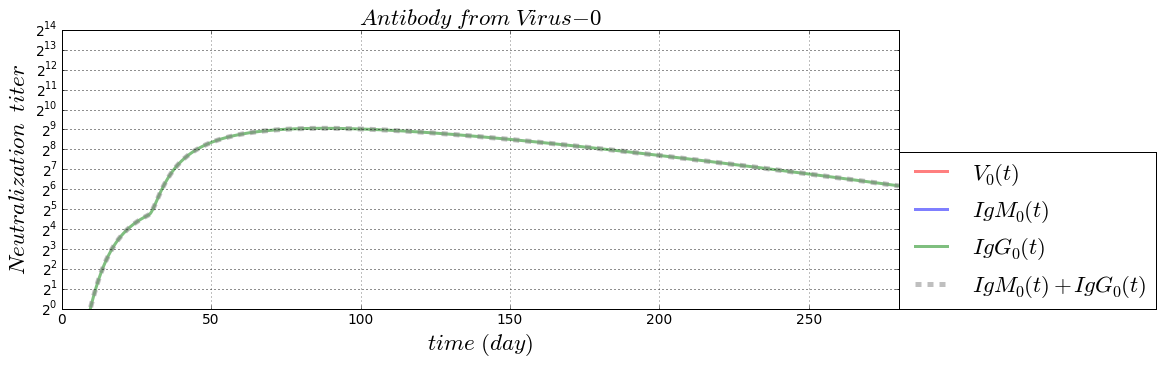

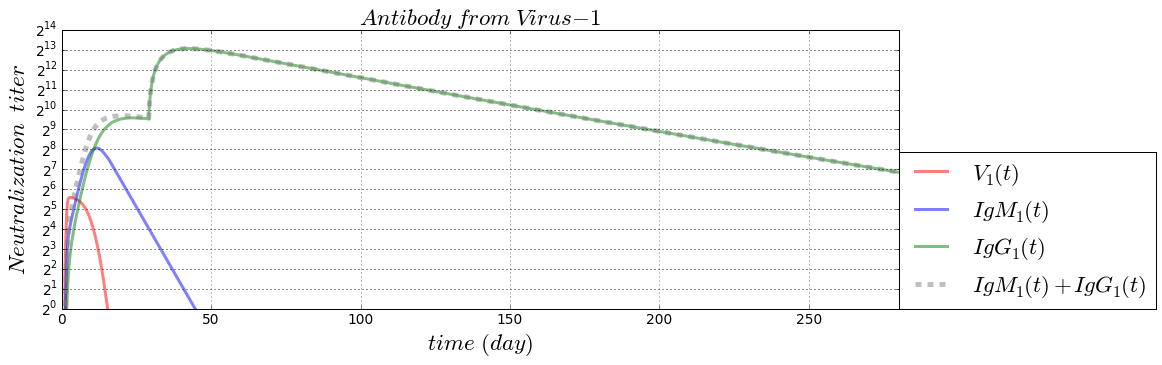

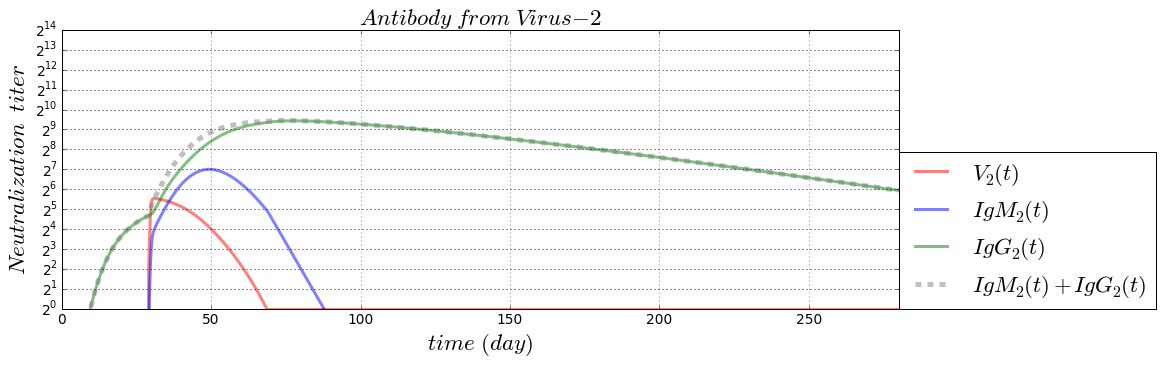

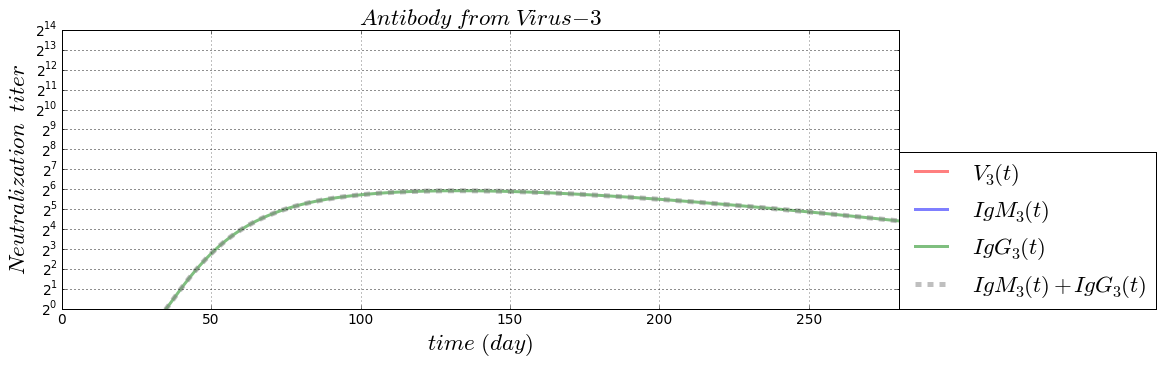

In [12]:
# setting parameter
timeUnit = 'day'
if timeUnit == 'hour':
    hour = float(1)
    day = float(24)
elif timeUnit == 'day':
    day = float(1)
    hour = float(1)/24 
elif timeUnit == 'year':
    year = float(1)
    day = float(1)/365
    hour = float(1)/24/365 
    
maxV = float(50) # max virus/micro-liter
inRateV = 0.2/hour # in-rate of virus
killRateVm = 0.0003/hour # kill-rate of virus by antibody-IgM
killRateVg = killRateVm # kill-rate of virus by antibody-IgG

inRateB = 0.06/hour # in-rate of B-cell
outRateB = inRateB/8 # out-rate of B-cell
actRateBm = killRateVm # activation rate of naive B-cell

inRateM = 0.16/hour # in-rate of antibody-IgM from naive B-cell
outRateM = inRateM/1  # out-rate of antibody-IgM from naive B-cell
consumeRateM = killRateVm # consume-rate of antibody-IgM by cleaning virus

inRateG = inRateM/10 # in-rate of antibody-IgG from memory B-cell
outRateG = outRateM/250 # out-rate of antibody-IgG from memory B-cell
consumeRateG = killRateVg  # consume-rate of antibody-IgG by cleaning virus
    
mutatRateB = 0.00002/hour # B-cell mutation rate
mutatRate = 0.0001/hour # mutation rate

# time boundary and griding condition
minT = float(0)
maxT = float(10*28*day)
totalPoint_T = int(1*10**3 + 1)
gT = np.linspace(minT, maxT, totalPoint_T)
spacingT = np.linspace(minT, maxT, num = totalPoint_T, retstep = True)
gT = spacingT[0]
dt = spacingT[1]

# space boundary and griding condition
minX = float(0)
maxX = float(3)
totalPoint_X = int(maxX - minX + 1)
gX = np.linspace(minX, maxX, totalPoint_X)
gridingX = np.linspace(minX, maxX, num = totalPoint_X, retstep = True)
gX = gridingX[0]
dx = gridingX[1]
gV_array = np.zeros([totalPoint_X, totalPoint_T])
gB_array = np.zeros([totalPoint_X, totalPoint_T])
gM_array = np.zeros([totalPoint_X, totalPoint_T])
gG_array = np.zeros([totalPoint_X, totalPoint_T])
# initial output condition
#gV_array[1, 0] = float(2)
#[pre-parameter, post-parameter, recovered-day, OAS+, OSA-]
actRateBg_1st = 0.0002/hour # activation rate of memory B-cell at 1st time (pre-)
actRateBg_2nd = actRateBg_1st*10 # activation rate of memory B-cell at 2nd time (post-)
event_parameter = np.array([[actRateBg_1st,
                            actRateBg_2nd,
                            14*day,
                            +5/hour,
                            -actRateBm - actRateBg_1st + (actRateBm + actRateBg_1st)/3]])
# [viral population, starting time, first]
event_1st = np.array([[0, 0*day],
                      [3, (1 + 0*28)*day], 
                      [3, (1 + 1*28)*day],
                      [0, (1 + 2*28)*day]]) 
# [viral population, starting time, 2nd]
event_2nd = np.array([[0, 0*28*day],
                      [0, 0*28*day], 
                      [0, 0*28*day],
                      [0, 0*28*day]]) 

event_table = np.array([event_parameter, event_1st, event_2nd])

# Runge Kutta numerical solution
pde_array = np.array([dVdt_array, dBdt_array, dMdt_array, dGdt_array])
initial_Out = np.array([gV_array, gB_array, gM_array, gG_array])
gOut_array = alva.AlvaRungeKutta4XT(pde_array, initial_Out, minX, maxX, totalPoint_X, minT, maxT, totalPoint_T, event_table)

# plotting
gV = gOut_array[0]  
gB = gOut_array[1] 
gM = gOut_array[2]
gG = gOut_array[3]

numberingFig = numberingFig + 1
for i in range(totalPoint_X):
    figure_name = '-response-%i'%(i)
    figure_suffix = '.png'
    save_figure = os.path.join(dir_path, file_name + figure_name + file_suffix)
    plt.figure(numberingFig, figsize = AlvaFigSize)
    plt.plot(gT, gV[i], color = 'red', label = r'$ V_{%i}(t) $'%(i), linewidth = 3.0, alpha = 0.5)
    plt.plot(gT, gM[i], color = 'blue', label = r'$ IgM_{%i}(t) $'%(i), linewidth = 3.0, alpha = 0.5)
    plt.plot(gT, gG[i], color = 'green', label = r'$ IgG_{%i}(t) $'%(i), linewidth = 3.0, alpha = 0.5)
    plt.plot(gT, gM[i] + gG[i], color = 'gray', linewidth = 5.0, alpha = 0.5, linestyle = 'dashed'
             , label = r'$ IgM_{%i}(t) + IgG_{%i}(t) $'%(i, i))
    plt.grid(True, which = 'both')
    plt.title(r'$ Antibody \ from \ Virus-{%i} $'%(i), fontsize = AlvaFontSize)
    plt.xlabel(r'$time \ (%s)$'%(timeUnit), fontsize = AlvaFontSize)
    plt.ylabel(r'$ Neutralization \ \ titer $', fontsize = AlvaFontSize)
    plt.xlim([minT, maxT])
    plt.xticks(fontsize = AlvaFontSize*0.6)
    plt.yticks(fontsize = AlvaFontSize*0.6) 
    plt.ylim([2**0, 2**14])
    plt.yscale('log', basey = 2)
    plt.legend(loc = (1,0), fontsize = AlvaFontSize)
    plt.savefig(save_figure, dpi = 100)
    plt.show()

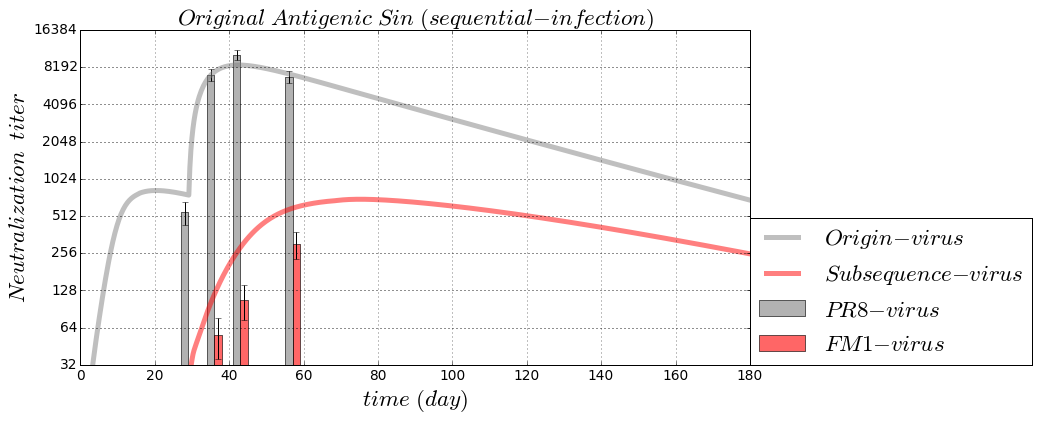

In [13]:
# Experimental lab data from OAS paper
gT_lab = np.array([28, 28 + 7, 28 + 14, 28 + 28])
gPR8_lab = np.array([2**(9 + 1.0/10), 2**(13 - 1.0/5), 2**(13 + 1.0/3), 2**(13 - 1.0/4)])
standard_PR8 = gPR8_lab**(3.0/4)

gFM1_lab = np.array([0, 2**(6 - 1.0/5), 2**(7 - 1.0/4), 2**(8 + 1.0/4)])
standard_FM1 = gFM1_lab**(3.0/4)
bar_width = 2.0

# Sequential immunization graph

numberingFig = numberingFig + 1
plt.figure(numberingFig, figsize = (12, 6))
plt.subplot(111)
plt.plot(gT, (gM[1] + gG[1]), linewidth = 5.0, alpha = 0.5, color = 'gray'
         , label = r'$ Origin-virus $')
plt.plot(gT, (gM[2] + gG[2]), linewidth = 5.0, alpha = 0.5, color = 'red'
         , label = r'$ Subsequence-virus $')
plt.bar(gT_lab - bar_width/2, gPR8_lab, bar_width, alpha = 0.6, color = 'gray', yerr = standard_PR8
        , error_kw = dict(elinewidth = 1, ecolor = 'black'), label = r'$ PR8-virus $')
plt.bar(gT_lab + bar_width/2, gFM1_lab, bar_width, alpha = 0.6, color = 'red', yerr = standard_FM1
        , error_kw = dict(elinewidth = 1, ecolor = 'black'), label = r'$ FM1-virus $')
plt.grid(True, which = 'both')
plt.title(r'$ Original \ Antigenic \ Sin \ (sequential-infection)$', fontsize = AlvaFontSize)
plt.xlabel(r'$time \ (%s)$'%(timeUnit), fontsize = AlvaFontSize)
plt.ylabel(r'$ Neutralization \ \ titer $', fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6) 
plt.xlim([minT, 6*30*day])
plt.ylim([2**5, 2**14])
plt.yscale('log', basey = 2)
# gca()---GetCurrentAxis and Format the ticklabel to be 2**x
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: int(2**(np.log(x)/np.log(2)))))
#plt.gca().xaxis.set_major_locator(plt.MultipleLocator(7))
plt.legend(loc = (1, 0), fontsize = AlvaFontSize)
plt.show()

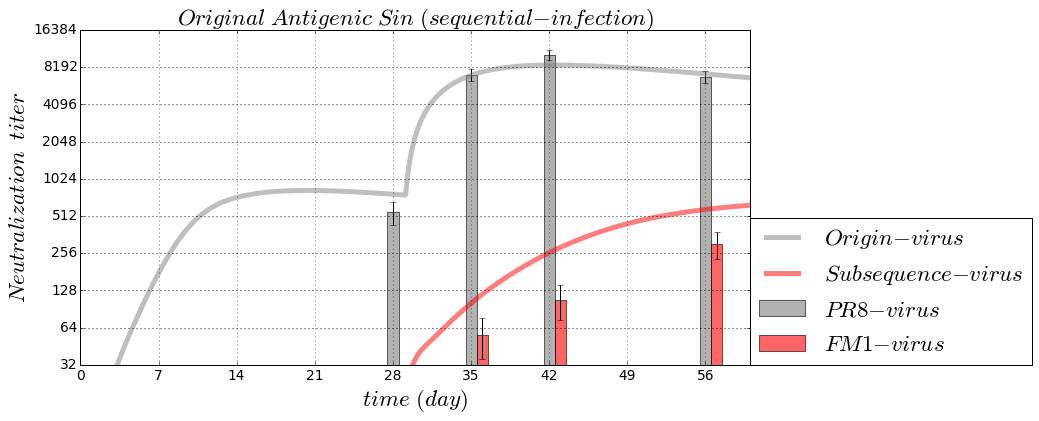

In [14]:
# Experimental lab data from OAS paper
gT_lab = np.array([28, 28 + 7, 28 + 14, 28 + 28])
gPR8_lab = np.array([2**(9 + 1.0/10), 2**(13 - 1.0/5), 2**(13 + 1.0/3), 2**(13 - 1.0/4)])
standard_PR8 = gPR8_lab**(3.0/4)

gFM1_lab = np.array([0, 2**(6 - 1.0/5), 2**(7 - 1.0/4), 2**(8 + 1.0/4)])
standard_FM1 = gFM1_lab**(3.0/4)
bar_width = 1.0

# Sequential immunization graph
figure_name = '-Original-Antigenic-Sin-infection'
figure_suffix = '.png'
save_figure = os.path.join(dir_path, file_name + figure_name + file_suffix)
numberingFig = numberingFig + 1
plt.figure(numberingFig, figsize = (12, 6))
plt.subplot(111)
plt.plot(gT, (gM[1] + gG[1]), linewidth = 5.0, alpha = 0.5, color = 'gray'
         , label = r'$ Origin-virus $')
plt.plot(gT, (gM[2] + gG[2]), linewidth = 5.0, alpha = 0.5, color = 'red'
         , label = r'$ Subsequence-virus $')
plt.bar(gT_lab - bar_width/2, gPR8_lab, bar_width, alpha = 0.6, color = 'gray', yerr = standard_PR8
        , error_kw = dict(elinewidth = 1, ecolor = 'black'), label = r'$ PR8-virus $')
plt.bar(gT_lab + bar_width/2, gFM1_lab, bar_width, alpha = 0.6, color = 'red', yerr = standard_FM1
        , error_kw = dict(elinewidth = 1, ecolor = 'black'), label = r'$ FM1-virus $')
plt.grid(True, which = 'both')
plt.title(r'$ Original \ Antigenic \ Sin \ (sequential-infection)$', fontsize = AlvaFontSize)
plt.xlabel(r'$time \ (%s)$'%(timeUnit), fontsize = AlvaFontSize)
plt.ylabel(r'$ Neutralization \ \ titer $', fontsize = AlvaFontSize)
plt.xticks(fontsize = AlvaFontSize*0.6)
plt.yticks(fontsize = AlvaFontSize*0.6) 
plt.xlim([minT, 2*30*day])
plt.ylim([2**5, 2**14])
plt.yscale('log', basey = 2)
# gca()---GetCurrentAxis and Format the ticklabel to be 2**x
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: int(2**(np.log(x)/np.log(2)))))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(7))
plt.legend(loc = (1, 0), fontsize = AlvaFontSize)
plt.savefig(save_figure, dpi = 100, bbox_inches='tight')
plt.show()